Random Forest Classification (iris Dataset)

In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris                              # dataset
from sklearn.model_selection import train_test_split                # split
from sklearn.ensemble import RandomForestClassifier                 # Random Forest
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Step 2: Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)             # features
y = pd.Series(iris.target)                                          # labels (0,1,2)


In [3]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [4]:
# Step 4: Initialize Random Forest model
rf = RandomForestClassifier(
    n_estimators=100,            # number of trees
    criterion='gini',            # impurity measure
    max_depth=None,              # allow full depth → can overfit
    min_samples_split=2,         # minimum samples needed to split a node
    min_samples_leaf=1,          # minimum samples in leaf
    max_features='sqrt',         # number of features to consider at each split
    bootstrap=True,              # use bootstrapped samples
    n_jobs=-1,                   # use all CPU cores
    random_state=42              # reproducibility
)

In [5]:
# Step 5: Train model
rf.fit(X_train, y_train)

# Step 6: Predict
y_pred = rf.predict(X_test)


In [8]:
# Step 7: Evaluate
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 0.9
Precision: 0.9023569023569024
Recall: 0.9
F1 Score: 0.899749373433584


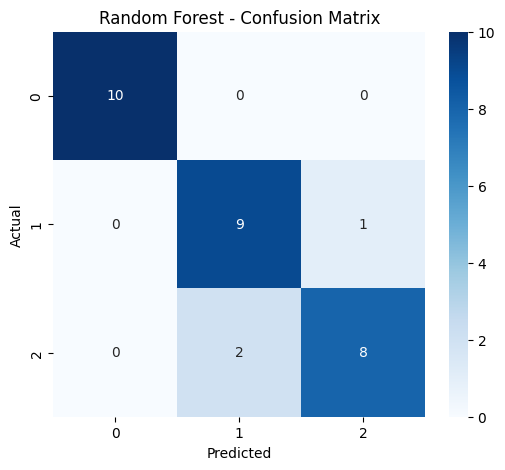

In [9]:
# Step 8: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()

In [10]:
# Step 9: Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 3, 5, 10],
    "max_features": ["sqrt", "log2"]
}

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)

Best Params: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100}


In [12]:
# Step 10: Save model + predictions
joblib.dump(rf, "C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Models\\RandomForestClassifier_model.pkl")
pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).to_csv("C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Predictions\\RandomForestClassifier_Predictions.csv", index=False)

Random Forest Regressor (California Housing)

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = fetch_california_housing(as_frame=True)
Xr = data.data
yr = data.target

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.2, random_state=42
)

rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

rf_reg.fit(Xr_train, yr_train)
yr_pred = rf_reg.predict(Xr_test)

r2 = r2_score(yr_test, yr_pred)
rmse = np.sqrt(mean_squared_error(yr_test, yr_pred))

print("Random Forest Regression — R2:", r2)
print("Random Forest Regression — RMSE:", rmse)


Random Forest Regression — R2: 0.7737402686595128
Random Forest Regression — RMSE: 0.544511508935255
